In [10]:
import random as r
import json

from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from AbstractArchitecture_v2 import AbstractArchitecture
from DenseEncoder import DenseEncoder
from DenseDecoder import DenseDecoder
from NormalizedMeanSquaredError import NormalizedMeanSquaredError as NMSE
from plot_model_prediction import plot_model_prediction

In [3]:
# Set Experiment Specifics
data_file_prefix = './data/Duffing_Equation_expt4'  ## FILL IN HERE (from file name)

# Network architecture design
l = 20  # Latent space size

activation = "relu"
initializer = tf.keras.initializers.VarianceScaling()
reg_lambda_l2 = 1e-6
regularizer = tf.keras.regularizers.l2(reg_lambda_l2)

act_layer = dict(activation=activation,
                 kernel_initializer=initializer,
                 kernel_regularizer=regularizer)
lin_layer = dict(activation=None,
                 kernel_initializer=initializer,
                 kernel_regularizer=regularizer)
latent_config = dict(activation=None,
                     kernel_regularizer=regularizer,
                     use_bias=False)

encoder_layers = 5
decoder_layers = 5
add_identity = True

# Model training setting
## Set optimizer
optimizer = keras.optimizers.Adam
optimizer_opts = {}

# Callback function(s) and fit method options
cbs = [keras.callbacks.EarlyStopping(patience=10)]
cbs = [keras.callbacks.ModelCheckpoint('CheckpointTest.tmp', save_weights_only=True, monitor='val_loss', save_best_only=True)]

model_weight_path = './CheckpointTest.tmp'

############################################
### Everything below here is automated!! ###
############################################


# Step 1. Load in the data
data_train_u = np.load("{}_train1_u.npy".format(data_file_prefix))
data_train_f = np.load("{}_train1_f.npy".format(data_file_prefix))
data_val_u = np.load("{}_val_u.npy".format(data_file_prefix))
data_val_f = np.load("{}_val_f.npy".format(data_file_prefix))
data_test_u1 = np.load("{}_test1_u.npy".format(data_file_prefix))
data_test_f1 = np.load("{}_test1_f.npy".format(data_file_prefix))
data_test_u = np.load("{}_test2_u.npy".format(data_file_prefix))
data_test_f = np.load("{}_test2_f.npy".format(data_file_prefix))

# Step 2. Set up the model architecture
_, n = data_train_u.shape

encoder_config = {'units_full': n,
                  'num_layers': encoder_layers,
                  'actlay_config': act_layer,
                  'linlay_config': lin_layer,
                  'add_init_fin': add_identity}

decoder_config = {'units_full': n,
                  'num_layers': decoder_layers,
                  'actlay_config': act_layer,
                  'linlay_config': lin_layer,
                  'add_init_fin': add_identity}

# Aggregate settings for model architecture
architecture_config = {'units_latent': l,
                       'units_full': n,
                       'u_encoder_block': DenseEncoder(**encoder_config),
                       'u_decoder_block': DenseDecoder(**decoder_config),
                       'F_encoder_block': DenseEncoder(**encoder_config),
                       'F_decoder_block': DenseDecoder(**decoder_config),
                       'latent_config': latent_config}

In [6]:
###############################################
# Step 5. Set up the full architecture run!!
###############################################

# Set up validation data, loss functions, and number of epochs
val_data = [(data_val_u, data_val_f), 
            (data_val_u, data_val_f, data_val_f, data_val_u)]
loss_fns = 4*[NMSE()]

# Instantiate the new model
full_model = AbstractArchitecture(**architecture_config,
                                  train_autoencoders_only=False)

# Load the weights
full_model.load_weights(model_weight_path)
full_model.compile(loss=loss_fns,
                   optimizer=optimizer())


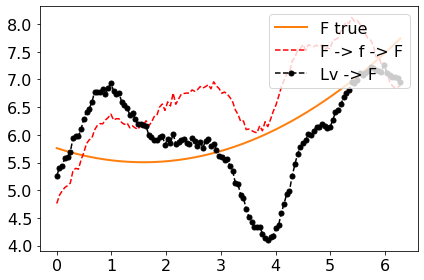

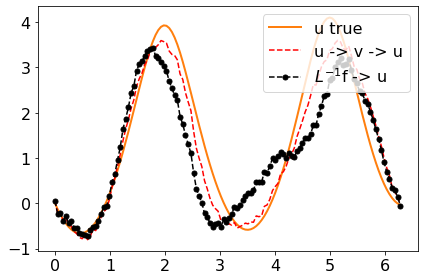

In [11]:
plot_model_prediction(full_model, 7, data_test_u, data_test_f)

In [14]:
data = {'train_u': data_train_u,
        'train_f': data_train_f,
        'val_u': data_val_u,
        'val_f': data_val_f}

def score_model(model, data):
    train_score = model.test_on_batch(x=[data['train_u'], data['train_f']],
                                      y=[data['train_u'], data['train_f'], data['train_f'], data['train_u']])
    print(train_score)
    
score_model(full_model, data)

[0.41345185, 0.003038849, 0.14197716, 0.2230625, 0.014772999]


In [17]:
loss = [0.84645890021831, 0.8404182111933709, 0.866605356366697, 0.8096205115119534, 0.7978718564032315, 0.8007383206925227, 0.7894265753569927, 0.7877764982350323, 0.7824258848298038, 0.7787110818431198, 0.7783799556554879, 0.7965697449363734, 1.0246115155198168, 0.9337709215890869, 0.9063512414582027, 0.7889028054667095, 0.7648340018901689, 0.7524293188305387, 0.7521840530219005, 0.7395863215492983, 0.7455796861509424, 0.7781039174768815, 0.7475555620873258, 0.7412444428882782, 0.8827293340043755, 0.8670543309249894, 0.7987773829373085, 0.7644818208773169, 0.7719745471508317, 0.7253640873226438, 0.7134449443701855, 0.8281656368268734, 0.7722133603032404, 0.7183302803156822, 0.6882005396759873, 0.6703240226188666, 0.6890242517789537, 0.6515063031507861, 0.6528522949161109, 0.6378461683278484, 0.8144335469488007, 0.7431105156648452, 0.6994509864916847, 0.6868480555759763, 0.6585262885387861, 0.638951344184947, 0.6568837052536488, 0.8701222833617124, 0.7921896817635476, 0.7041080452194309, 0.666119613936664, 0.6413700361210091, 0.6330096275421817, 0.6154905343214737, 51.40705050488918, 4.510015234344947, 1.86619604329558, 1.461307158764326, 1.2093951609443754, 1.1126030905140396, 1.0418555229939537, 0.9970919512221593, 0.9627599179769566, 0.9594816554581538, 0.9379448925221449, 0.9047863197455858, 0.8842864813731084, 0.8710200498878286, 0.9004866627168039, 0.8790979261644783, 0.8716727863902497, 0.8432220844439339, 0.8398745272894013, 0.835154242742156, 0.8298479461232638, 0.8181200841408364, 0.8021904833369475, 0.8318746261867, 0.8351269382245842, 0.808873188575142, 0.8035403890329482, 0.7883123871484067, 0.7797819217973672, 0.7948912728970724, 0.8222390312907993, 0.8210451031734964, 0.794351628965614, 0.7879894860787608, 0.7750752909872223, 0.8471556028359728, 0.7970260700467926, 0.7776158847327826, 0.7518920891480726, 0.7403705418482578, 0.7359614103423798, 0.7578208795832116, 0.7365284284088401, 0.7311408076995907, 0.7283606703652099, 0.7230231617082402, 0.7742277087644519, 0.8033764501222227, 0.7439934847353895, 0.7565884596111875, 0.7653279967634019, 0.759154063679368, 0.7419639921476564, 0.7305597876846517, 0.7455246756851003, 0.7294373796253515, 0.7204840668493034, 0.7213931206665023, 0.7005441952815101, 0.6904707227015605, 0.72259017769224, 1.5511330684655504, 5.085368157973534, 15.056557801029195, 2.0454473135718807, 1.5765245559067467, 1.4083471083551609, 1.3454323986660892, 1.296678824144485, 1.2416155411581935, 1.1997674788073134, 1.166839812138817, 1.1663095137634691, 1.1562615131626233, 1.1164353867280776, 1.0978752393531719, 1.0872621791667867, 1.074801747229458, 1.063898700781294, 1.0585464220237812, 1.0439811732283033, 1.040506724915737, 1.030884421532628, 1.0206266546955005, 1.0166079035248543, 1.0090132805644199, 1.0113975352274969, 1.0008398717818234, 1.0023411988913888, 0.9880477501084876, 0.9897936379079671, 0.9787924832331731, 0.9727562460466045, 0.9713901170545342, 0.9728836602298058, 0.9689558928288138, 0.9608513200814747, 0.9617381379623222, 0.9492961455504564, 0.9545335336097234, 0.9406556035141589, 0.9507765783872044, 0.943771376168544, 0.9962767526575703, 0.9780324597118198, 0.9430940949752858, 0.9262298329664599, 0.9112309203539455, 0.9097904085417299, 0.9070208624732052, 0.9004682039608305, 0.9167920625324099, 0.9801557559974992, 0.934544747374663, 0.9200293167077686, 0.9123894708163542, 0.8948349833935686, 0.8723038366656842, 0.8597200066658695, 0.851602531115479, 0.8510281337505085, 0.8493171123078884, 0.841915150889261, 0.8383983126924951, 0.8339460036216949, 0.8272869035868706, 0.8254907664382095, 0.836553343537948, 0.8175772591002934, 0.8123424972977028, 0.8277129586063956, 0.8062881052916424, 0.7985709474801321, 0.8064927505721347, 0.8161531918095568, 0.83692064360809, 0.8007608173836664, 0.8912544825167495, 0.8339133579415945, 0.7926007810112038, 0.9175804221863645, 0.9074775065517068, 0.8782623616692025, 0.8408603501995686, 0.8077398692632328, 0.7843209193020177, 0.7767781594138485, 0.7682408424604431, 1.024961304197514, 1.1430597878734785, 0.9888055140199935, 0.9314223462315886, 0.8984961223483036, 0.9033619046410007, 0.8395759198455922, 0.8262960112755773, 0.824699753942764, 0.8361342713056678, 0.7989269107418688, 0.7846620312677219, 0.7857723169249264, 0.7737043434602611, 0.7873563251305541, 0.7822955276082585, 0.9523128289240209, 0.7484525709710751, 0.7242230866888554, 0.7104115633231096, 0.7155093721619941, 0.7064035758220837, 0.6929507290834981, 0.6952665933672216, 0.6830061454731209, 0.6941058366385139, 0.6869920712801356, 0.6733860466171175, 0.6758455624675791, 0.66194768322662, 0.946906856121049, 1.17488313103875, 0.9053397688730501, 0.8261485184764504, 0.7945998636768877, 0.7921587719724495, 0.7592094260088947, 0.7432070860717633, 0.7300001807687878, 0.7462428471554116, 0.7296335668353152, 0.7098899637723576, 0.7391532953205879, 0.8109038530811263, 0.7045354313679465, 0.6941517820801523, 0.6854096701513881, 0.6756864937706359, 0.6713697344822503, 0.6690742660184958, 0.6526877562072487, 0.6516896220434204, 0.6716458563905997, 0.6667925045856986, 0.651597585539959, 0.6799471944558119, 0.9796205742650352, 0.7833018325030083, 0.6974806198729928, 0.6623454155798701, 0.6395543680781371, 0.6534049806867157, 0.6277098913846686, 0.6185571560515817, 0.6304985255984378, 0.6211070824335296, 0.6571361549251424, 0.6573951151680082, 0.8985819372349652, 0.8346615657303521, 0.7483583872345101, 0.700760165419664, 0.6729632503740884, 0.6888352783583959, 0.6679773241989609, 0.6695531136346589, 0.6394632799817205, 0.6685282008108272, 0.6502858836633953, 0.6108679790802924, 1.9346725412486443, 0.9851135286801852, 0.8033867697012131, 0.7421056743262459, 0.7148385734894018, 0.6924848541611182, 0.6996769477497194, 0.6740983336505516, 0.6574267200898906, 0.6527075710620618, 0.6437372759562227, 0.6273219936735782, 0.650772681679513, 0.7015716865093522, 0.6340507398351325, 0.6116399259406261, 0.6011789215262009, 0.6420676331810278, 0.6153258646264976, 0.6968388711476933, 0.6400215238419709, 0.6142125599033488, 0.5955066349219162, 0.597781826874374, 0.6251495578180705, 0.6779305291652878, 0.6034681434281521, 0.5669822124900198, 0.8732031758699182, 0.8230205788469255, 0.7355447731797226, 0.695762367509911, 0.6676082348714226, 0.6511207180204069, 0.6407116217730492, 0.6325616333424027, 0.6194061501019197, 0.6153681583829897, 0.6221972354355828, 0.6168678937081548, 0.6083936383943848, 0.5980620817275483, 0.5895194521592328, 0.5813217458376143, 0.5786549409959355, 0.5733157467126548, 0.5871471603645191, 0.6020834292904343, 0.6214560154280399, 0.5697467479670033, 0.6135586195312077, 0.5752198024062427, 0.5557116609208034, 0.8070186427505178, 0.8737191530554034, 0.7861491214637709, 0.6695559558246273, 0.6212063255335898, 0.6000268810140237, 0.5807483948832405, 0.5936824144572703, 0.5646954320678615, 0.5354304230178382, 0.5164561328191268, 0.5273466815845128, 0.5056155722754456, 0.4828135503138438, 3.935747046975505, 2.373556119519107, 1.3808759884220105, 1.1436122474495496, 1.0593244206065584, 0.9996774420732257, 0.9432006451227904, 0.9185626102815623, 0.8838525827401079, 0.8558861544202794, 0.8477357616023056, 0.805097373240488, 0.8643008742843284, 0.874606776605203, 0.8105910729994223, 0.795467968109301, 0.7703212772174992, 0.7591683208420655, 0.7402257232081647, 0.7093924868350329, 0.7019205023567594, 0.6817660830377688, 0.6875371901926373, 0.657464287339672, 0.6523215309835166, 0.6707491765374092, 0.6412913336908882, 0.6313509616368808, 0.6176237455379372, 0.6041762196754306, 0.7260699680866227, 0.7047472074658934, 0.6678363769538406, 0.6357222818592878, 0.6051816274569203, 0.5827102556284292, 0.5685477708965204, 0.5862523819963948, 0.5449385609463783, 0.549301947663853, 0.5862814812622452, 0.5354234489886748, 6.205126802043748, 1.6919569575125697, 1.231607682384914, 1.1221220422258174, 1.0116409205456185, 0.9605775221331312, 0.9139855490122402, 0.8899024388053707, 0.8829350788775162, 0.8409749033948987, 0.8112215043704377, 0.80084308453926, 0.784465503374603, 0.7671871050391013, 0.7605538966507651, 0.7504235241700332, 0.7338352500025855, 0.7201927442906448, 0.7135686288778361, 0.7171266803944195, 0.6937949740176104, 0.6870141033830122, 0.6783327889869789, 0.6843344892447767, 1.0073037328398093, 5.575198674261594, 1.693072611066191, 1.2382707579427086, 1.1422791872585054, 1.0808932165048082, 1.04869297008904, 1.0161252135582495, 0.9785753691280916, 0.9088535917555605, 0.8599554272978045, 0.8156159782270532, 0.7770456882902561, 0.7577405397272845, 0.7245690015864005, 0.7144865875643658, 0.6864110318607666, 0.6882517426994852, 0.6814998852406605, 0.6641667225351926, 0.6549604265776313, 0.6436676202390829, 0.6325849691819727, 0.626309095173391, 0.6329791735191552, 0.6371915593600462, 0.6220427869309382, 0.6158156545771416, 0.6427115073498213, 0.6557295532612166, 0.639561576438775, 0.6389949549084258, 0.6060228201934525, 0.5964031961372664, 0.5846555624568696, 0.5727678343572931, 0.5816191661700749, 0.5620933455594036, 0.5558811530514328, 0.5397929998177595, 0.5538528060704383, 0.6077863587444651, 0.56638222050796, 0.6335308629555124, 0.5838415313631656, 0.5329766924205349, 0.53161188794852, 0.5938445378487783, 0.5527777512056622, 0.5197733994099735, 0.49895391073163325, 0.4973682875979091, 0.49617005905145006, 0.490682269494302, 0.5277583234853772, 0.49559655881216247, 0.4952212644895448, 1.070982825910116, 1.5262733651181468, 1.263058073772098, 0.9351708172956771, 0.7771504222228657, 0.727442479893882, 0.6513707827855866, 0.6697831206293889, 0.6602754519600926, 0.623688128750838, 0.5754122200137429, 0.5562580015670264, 0.5525500579718104, 0.5696943557823931, 0.5626504978521409, 0.5333940534106688, 0.5385070910872196, 0.5980435354156065, 0.6505794163891155, 0.570465221758831, 0.555532754635304, 0.5292675957524712, 0.513329279179273, 0.5538801839447062, 0.6625200932897494, 0.6258878372718315, 0.9494970357383277, 0.7106189051236943, 0.5822451843873517, 0.5360099236236706, 0.5269669491134618, 0.5848901943148748, 0.5472277801650025, 0.558747132354202, 0.5179196008670921, 0.5060007829077794, 0.622236170585874, 0.5542346774513098, 0.5231018749909284, 0.5107629108597905, 0.5054564962241986, 0.47520928310324323, 0.5634878758541392, 0.5586332558542055, 0.4970638625519432, 0.5743670900844942, 0.533146622157087, 0.5764471914381621, 0.5457023623810554, 0.49762760443755016, 0.4779486544880583, 0.4940831747190214, 0.49733172391245095, 0.6584987871445135, 0.4993198687407115, 0.4507479692012283, 0.4236338224297715, 0.420564771245151, 0.49760375672849627, 0.6198866048322315, 0.5236801324212685, 0.47919120290171063, 0.5256882488305195, 1.1101199285891614, 1.4237646615569817, 2.8191331559392303, 11.597226247831204, 2.4370261923180565, 2.1521343344099675, 2.1358687855790883, 2.016378017702218, 1.952881674559825, 1.898135859104632, 1.8569355647034225, 1.8248595329263202, 1.7873613355854443, 1.7566747307628332, 1.7203570499972733, 1.6906159010565545, 1.6393674420734006, 2.636889292876787, 1.8141838818502805, 1.5683665726770208, 1.4762313579111708, 1.3945156199179773, 1.3321395566335268, 1.2958062119462084, 1.2297983012034428, 1.1898495073664332, 1.1406399222054349, 1.1008092283258442, 1.0722948285926128, 1.0380229401856773, 1.0045756997044457, 0.9807672014133092, 0.9514066789636219, 0.9333952267053675, 0.9244001206133255, 0.9044154171846269, 0.9040141475354696, 0.90762799769553, 0.8953627908711833, 0.8832645846585921, 0.862383616745795, 0.838849856859448, 0.8349173025271951, 0.828637122263159, 0.8150642656594229, 0.8047614886940594, 0.7977918152662057, 0.7793919691546553, 0.7769137459677823, 0.8130526262901882, 0.8439872378406549, 0.7549140934101389, 0.7356390551061817, 0.7141617537290168, 0.7135736482895727, 0.6811548009073799, 2.4586688896773903, 3.925083593360182, 1.6818481131164469, 1.30501389543232, 1.1023990181447467, 1.023271976187111, 0.9708225819010097, 0.9387126317268711, 0.9106535231286955]

In [19]:
min(loss), loss[-1]

(0.420564771245151, 0.9106535231286955)